In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('inclass-data/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'edu', 'edu-num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'cap-gain', 'cap-loss','hpw','native country','income']
df.head()

,age,workclass,fnlwgt,edu,edu-num,marital,occupation,relationship,race,sex,cap-gain,cap-loss,hpw,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Drop useless features (columns)

In [3]:
df = df.drop(columns=['fnlwgt', 'edu', 'cap-gain', 'cap-loss', 'native country'])

In [4]:
df['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [5]:
df.head()

,age,workclass,edu-num,marital,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [6]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [7]:
# remove the ? from the all column
for i in df.columns:
    dfi_nc = df[df[i] == ' ?'].index
    df = df.drop(labels=dfi_nc)

In [8]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
Name: workclass, dtype: int64

In [9]:
df['income'].value_counts()

 <=50K    23068
 >50K      7650
Name: income, dtype: int64

In [10]:
df['hpw'].value_counts()

40    14525
50     2763
45     1791
60     1441
35     1203
      ...  
82        1
94        1
92        1
87        1
74        1
Name: hpw, Length: 94, dtype: int64

<AxesSubplot:>

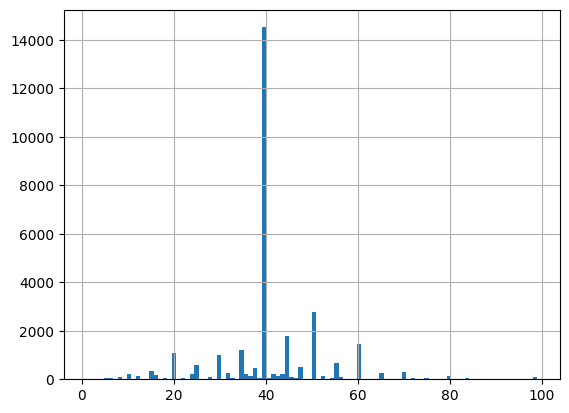

In [11]:
df['hpw'].hist(bins=100)

In [12]:
# Find the index of the rows with hpw == 1
df[df['hpw'] == 1].index

Int64Index([189, 1036, 11451, 19750, 20909, 22960, 24284, 25078], dtype='int64')

In [13]:
# %%timeit
# Find the index of the rows where hpw count is 1 : Method 1
df.groupby("hpw").filter(lambda x: len(x) <= 5)

,age,workclass,edu-num,marital,occupation,relationship,race,sex,hpw,income
729,65,Self-emp-not-inc,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,59,>50K
1243,65,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,59,>50K
3426,39,Local-gov,12,Divorced,Prof-specialty,Not-in-family,White,Male,59,<=50K
3876,61,Private,4,Married-civ-spouse,Transport-moving,Husband,White,Male,31,<=50K
6380,33,Private,9,Never-married,Transport-moving,Not-in-family,White,Male,87,<=50K
6390,44,Self-emp-not-inc,7,Married-civ-spouse,Farming-fishing,Husband,White,Male,88,<=50K
6401,55,Private,13,Divorced,Adm-clerical,Unmarried,White,Female,73,<=50K
7142,48,Private,9,Married-civ-spouse,Tech-support,Husband,White,Male,89,<=50K
7678,31,Local-gov,13,Married-civ-spouse,Protective-serv,Husband,White,Male,97,>50K
8218,65,Private,9,Divorced,Adm-clerical,Unmarried,White,Female,59,<=50K


In [14]:
# %%timeit
df[df.groupby("hpw")["hpw"].transform('size') > 5]

,age,workclass,edu-num,marital,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [15]:
# %%timeit
df = df[df['hpw'].map(df['hpw'].value_counts()) > 5]

In [16]:
from scipy import stats
df = df[(np.abs(stats.zscore(df['age'])) < 3)]
stats.zscore(df['hpw'])

0       -0.078890
1       -2.356220
2       -0.078890
3       -0.078890
4       -0.078890
           ...   
32556   -0.247581
32557   -0.078890
32558   -0.078890
32559   -1.765801
32560   -0.078890
Name: hpw, Length: 30549, dtype: float64

In [17]:
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

numeric_features = ["age", "edu-num", "hpw"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["workclass", "marital", "occupation","relationship","race"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [18]:
df.head()

,age,workclass,edu-num,marital,occupation,relationship,race,sex,hpw,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K


In [19]:
x = df.iloc[:,:-1]    #Split only data
y = df.iloc[:,-1]     #Split the target out

x_new  = preprocessor.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = 0.1,random_state = 0)

In [21]:
# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

X_train shape (27494, 42)
y_train shape (27494,)
X_test shape (3055, 42)
y_test shape (3055,)


In [22]:
#Build logistic regression model
clf = LogisticRegression()
clf.fit(x_train,y_train)
# = theta0 + theta1*x _theta2*y
print("Theta0: ",clf.intercept_[0])
print("Theta1: ",clf.coef_[0][0])
print("Theta2: ",clf.coef_[0][1])
print("0 = {:.4f}+{:.4f}x+{:.4f}y".format(clf.intercept_[0],clf.coef_[0][0],clf.coef_[0][1]))

Theta0:  -2.553927422492789
Theta1:  0.4051112693886674
Theta2:  0.7648331571361858
0 = -2.5539+0.4051x+0.7648y


c:\program files\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
y_pred = clf.predict(x_train)

# Classification report
from sklearn.metrics import classification_report,confusion_matrix

print("Classification report \n=======================")
print(classification_report(y_true=y_train, y_pred=y_pred))
print("Confusion matrix \n=======================")

print(confusion_matrix(y_true=y_train, y_pred=y_pred))

Classification report 
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     20633
        >50K       0.70      0.56      0.62      6861

    accuracy                           0.83     27494
   macro avg       0.78      0.74      0.76     27494
weighted avg       0.82      0.83      0.82     27494

Confusion matrix 
[[18954  1679]
 [ 3014  3847]]


c:\program files\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


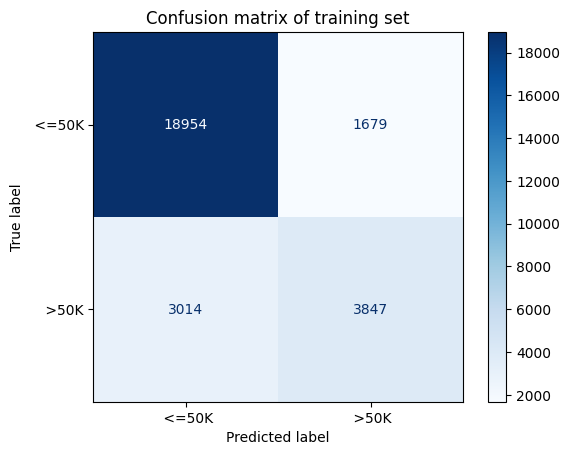

In [24]:
# Plot confusion matrix of training set
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,
                      x_train,
                      y_train,
                      display_labels=list(set(y_test)),
                      cmap=plt.cm.Blues) 
plt.title('Confusion matrix of training set')
plt.show()  

In [25]:
print("model score: %.3f" % clf.score(x_test, y_test))

model score: 0.841
